In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the datasets into dataframes
movies_df = pd.read_csv("E:\\AI Portfolio Projects\\CineScope\\data\\Movies.csv")
reviews_df = pd.read_csv("E:\\AI Portfolio Projects\\CineScope\\data\\Reviews.csv")

#Obtain basic details of the dataframes

#Movies Dataset
print(movies_df.head())
print(f"Shape = {movies_df.shape}")
print("Basic Info: ")
print(movies_df.info())
print("-" * 40)

#Reviews Dataset
print(reviews_df.head())
print(f"Shape = {reviews_df.shape}")
print("Basic Info: ")
print(reviews_df.info())
print("-" * 40)

                      title              director release_year  runtime  \
0  The Shawshank Redemption        Frank Darabont       (1994)  142 min   
1             The Godfather  Francis Ford Coppola       (1972)  175 min   
2           The Dark Knight     Christopher Nolan       (2008)  152 min   
3          Schindler's List      Steven Spielberg       (1993)  195 min   
4              12 Angry Men          Sidney Lumet       (1957)   96 min   

                       genre  rating  metascore     gross  
0                      Drama     9.3         82   $28.34M  
1               Crime, Drama     9.2        100  $134.97M  
2       Action, Crime, Drama     9.0         84  $534.86M  
3  Biography, Drama, History     9.0         95   $96.90M  
4               Crime, Drama     9.0         97    $4.36M  
Shape = (1000, 8)
Basic Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  -----

In [2]:
#Check for null or empty values in each dataframe

#Movies Dataset
print("MOVIES DATASET")
print("-" *15)

print("The number of empty/null values in each column of the dataset is:")
print(movies_df.isnull().sum())

print(f"The percentage of null values: \n{movies_df.isnull().mean()}")
print("-" * 40)

#Reviews Dataset
print("REVIEWS DATASET")
print("-" * 15)

print("The number of empty/null values in each column of the dataset is:")
print(reviews_df.isnull().sum())

print(f"The percentage of null values: \n{reviews_df.isnull().mean()}")
print("-" * 40)


MOVIES DATASET
---------------
The number of empty/null values in each column of the dataset is:
title           0
director        0
release_year    0
runtime         0
genre           0
rating          0
metascore       0
gross           0
dtype: int64
The percentage of null values: 
title           0.0
director        0.0
release_year    0.0
runtime         0.0
genre           0.0
rating          0.0
metascore       0.0
gross           0.0
dtype: float64
----------------------------------------
REVIEWS DATASET
---------------
The number of empty/null values in each column of the dataset is:
review       0
sentiment    0
dtype: int64
The percentage of null values: 
review       0.0
sentiment    0.0
dtype: float64
----------------------------------------


In [3]:
print(movies_df.dtypes)

#create a copy of the original dataframe
clean_movies = movies_df.copy()

#Change the format of release year and convert it to a numeric value
clean_movies['release_year'] = movies_df['release_year'].str.strip('()')
clean_movies['release_year'] = pd.to_numeric(clean_movies['release_year'], errors='coerce')

#Convert float year into the integer datatype
clean_movies['release_year'] = clean_movies['release_year'].fillna(0).astype(int)

#Remove the 'min' string from the 'runtime' column and change the value to int
clean_movies['runtime'] = clean_movies['runtime'].str.strip(' min')
clean_movies['runtime'] = pd.to_numeric(clean_movies['runtime'], errors='coerce')

#Remove the '$' sign and 'M' signs from 'gross' column. Also, multiply the value by 1 million
clean_movies['gross'] = clean_movies['gross'].str.replace('$', '', regex=False)
clean_movies['gross'] = clean_movies['gross'].str.replace('M', '', regex=False)
clean_movies['gross'] = pd.to_numeric(clean_movies['gross'], errors='coerce').astype(int)
clean_movies['gross'] = clean_movies['gross'].replace(0, np.nan)
clean_movies['gross'] = clean_movies['gross'] * 1000000

#Checking and verifying the structure of data
print(clean_movies.head())
print(clean_movies.dtypes)

title            object
director         object
release_year     object
runtime          object
genre            object
rating          float64
metascore         int64
gross            object
dtype: object
                      title              director  release_year  runtime  \
0  The Shawshank Redemption        Frank Darabont          1994      142   
1             The Godfather  Francis Ford Coppola          1972      175   
2           The Dark Knight     Christopher Nolan          2008      152   
3          Schindler's List      Steven Spielberg          1993      195   
4              12 Angry Men          Sidney Lumet          1957       96   

                       genre  rating  metascore        gross  
0                      Drama     9.3         82   28000000.0  
1               Crime, Drama     9.2        100  134000000.0  
2       Action, Crime, Drama     9.0         84  534000000.0  
3  Biography, Drama, History     9.0         95   96000000.0  
4               Crime,

In [4]:
#Clean and format 'Genre' column
print(clean_movies['genre'].head())

#Check for unique combinations and missing values
print(f"Unique Combinations: {clean_movies['genre'].value_counts()}")
print(f"Missing values in genre: {clean_movies['genre'].isnull().sum()}")

#Clear whitespaces and format the text
clean_movies['genre'] = clean_movies['genre'].str.strip().str.title()

#Create a new column to store genre values as list
clean_movies['genre_list'] = clean_movies['genre'].str.split(', ')

0                        Drama
1                 Crime, Drama
2         Action, Crime, Drama
3    Biography, Drama, History
4                 Crime, Drama
Name: genre, dtype: object
Unique Combinations: genre
Drama                       91
Drama, Romance              38
Comedy, Drama               34
Comedy, Drama, Romance      32
Crime, Drama, Mystery       30
                            ..
Action, Adventure, War       1
Animation, Sci-Fi            1
Action, Crime, Sci-Fi        1
Action, Crime, Mystery       1
Fantasy, Mystery, Sci-Fi     1
Name: count, Length: 195, dtype: int64
Missing values in genre: 0


count    1000.00000
mean        7.96870
std         0.27562
min         7.60000
25%         7.80000
50%         7.90000
75%         8.10000
max         9.30000
Name: rating, dtype: float64
count    1000.000000
mean       66.653000
std        30.712829
min         0.000000
25%        64.750000
50%        77.000000
75%        86.000000
max       100.000000
Name: metascore, dtype: float64
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Top-rated movies: 
                      title  rating
0  The Shawshank Redemption     9.3
1             The Godfather     9.2
(2, 9)
Low-rated movies: 
Empty DataFrame
Columns: [title, rating]
Index: []
(0, 9)
Movies with high metascore: 
                                           title  metascore
1                                  The Godfather        100
3                               Schindler's List         95
4                                   12 Angry Men         97
5  The Lord of the Rings: The Return of the King         94
8              

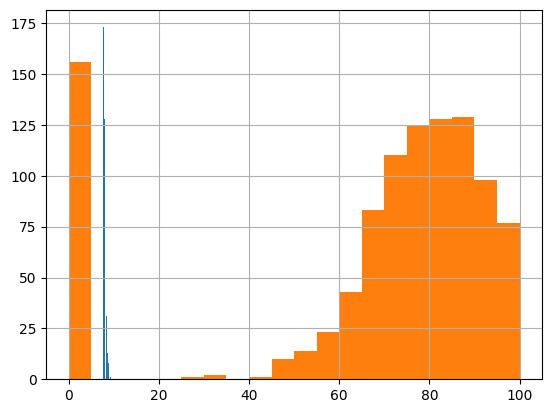

In [5]:
#Analyze the values of the ratings and metascore column
print(clean_movies['rating'].describe())
print(clean_movies['metascore'].describe())

print(clean_movies['rating'].hist(bins=20))
print(clean_movies['metascore'].hist(bins=20))

#Outlier detection - for rating and metascore
high_rating = clean_movies[clean_movies['rating'] > 9.0]
low_rating = clean_movies[clean_movies['rating'] < 6.0]

print("Top-rated movies: ")
print(high_rating[['title', 'rating']].head())
print(high_rating.shape)

print("Low-rated movies: ")
print(low_rating[['title', 'rating']].head())
print(low_rating.shape)


high_metascore = clean_movies[clean_movies['metascore'] > 90]
low_metascore = clean_movies[clean_movies['metascore'] < 60]

print("Movies with high metascore: ")
print(high_metascore[['title', 'metascore']].head())
print(high_metascore.shape)

print("Movies with low metascore: ")
print(low_metascore[['title', 'metascore']].head())
print(low_metascore.shape)

#Flag the missing metascore values for future analysis
clean_movies['metascore_missing'] = clean_movies['metascore'].isna()

count    6.920000e+02
mean     8.297399e+07
std      1.228246e+08
min      1.000000e+06
25%      7.000000e+06
50%      3.500000e+07
75%      1.072500e+08
max      9.360000e+08
Name: gross, dtype: float64
count    1000.000000
mean      124.136000
std        28.690253
min        45.000000
25%       103.000000
50%       120.000000
75%       138.000000
max       321.000000
Name: runtime, dtype: float64


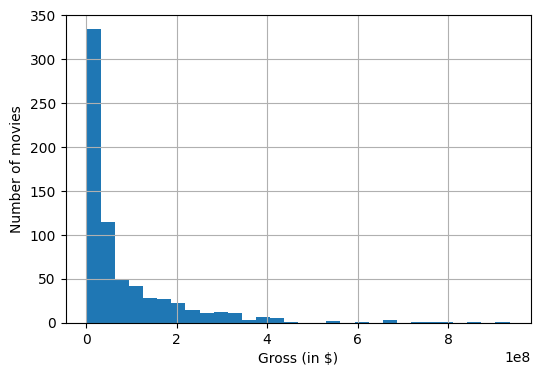

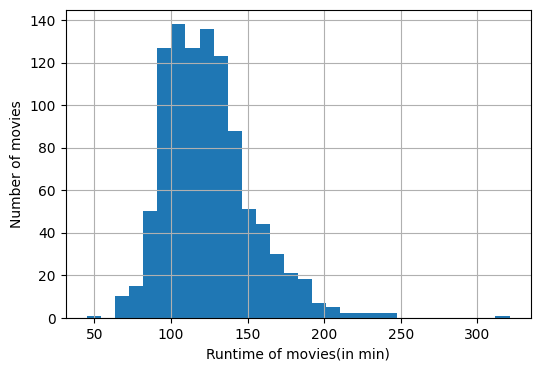

In [6]:
#Analyze and visualize the gross and runtime values of each movie
print(clean_movies['gross'].describe())
print(clean_movies['runtime'].describe())

#Visualize 'Gross'
clean_movies['gross'].hist(bins=30, figsize=(6,4))
plt.xlabel('Gross (in $)')
plt.ylabel('Number of movies')
plt.show()

#Visualize 'Runtime'
clean_movies['runtime'].hist(bins=30, figsize=(6,4))
plt.xlabel('Runtime of movies(in min)')
plt.ylabel('Number of movies')
plt.show()



In [7]:
#Identify gross value outliers
low_gross = clean_movies[(clean_movies['gross'] < 10000000) & (clean_movies['gross'].notna())]
high_gross = clean_movies[clean_movies['gross'] > 500000000]

print("Low Grossing Movies: ")
print(low_gross[['title', 'gross']].head())

print("High Grossing Movies: ")
print(high_gross[['title', 'gross']].head())

#Calculate the number of missing gross and runtime values, and add a flag column to the dataset
print(f"Number of missing gross values: {clean_movies['gross'].isna().sum()}")
clean_movies['isGrossNull'] = clean_movies['gross'].isnull()

print(f"Number of missing runtime values: {clean_movies['runtime'].isnull().sum()}")
clean_movies['isRuntimeNull'] = clean_movies['runtime'].isnull()

print(clean_movies.head())

Low Grossing Movies: 
                             title      gross
4                     12 Angry Men  4000000.0
13  The Good, the Bad and the Ugly  6000000.0
31                     City of God  7000000.0
47                      Casablanca  1000000.0
48              American History X  6000000.0
High Grossing Movies: 
                       title        gross
2            The Dark Knight  534000000.0
61         Avengers: Endgame  858000000.0
67    Avengers: Infinity War  678000000.0
90         Top Gun: Maverick  718000000.0
142  Spider-Man: No Way Home  804000000.0
Number of missing gross values: 308
Number of missing runtime values: 0
                      title              director  release_year  runtime  \
0  The Shawshank Redemption        Frank Darabont          1994      142   
1             The Godfather  Francis Ford Coppola          1972      175   
2           The Dark Knight     Christopher Nolan          2008      152   
3          Schindler's List      Steven Spielberg  

In [8]:
#Categorize the runtime values according to length
def categorizeRuntime(mins):
    if mins < 90:
        return "Short"
    elif 90 <= mins < 120:
        return "Medium"
    else:
        return "Long"
    
clean_movies['runtime_category'] = clean_movies['runtime'].apply(categorizeRuntime)
print(clean_movies['runtime_category'].value_counts())


runtime_category
Long      515
Medium    419
Short      66
Name: count, dtype: int64


In [11]:
clean_movies.to_csv("../data/CleanMovies.csv", index=False)

In [ ]:
print(clean_movies['genre'].head(10))

0                           Drama
1                    Crime, Drama
2            Action, Crime, Drama
3       Biography, Drama, History
4                    Crime, Drama
5        Action, Adventure, Drama
6                    Crime, Drama
7    Animation, Action, Adventure
8                    Crime, Drama
9       Action, Adventure, Sci-Fi
Name: genre, dtype: object
